In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [2]:
df_rat = pd.read_csv("ratings_Electronics.csv")

In [3]:
df_rat.columns = ['userID','productID','ratings','timestamp']

In [4]:
df_rat.head()

,userID,productID,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
df_rat.shape

(7824481, 4)

In [6]:
# Dropping timestamp column
df = df_rat.drop('timestamp', axis=1)
df.head(5)

,userID,productID,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


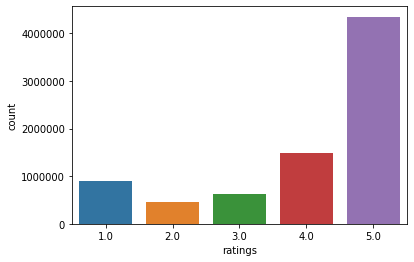

In [7]:
p=sns.countplot(df['ratings'])

In [8]:
df['ratings'].describe().transpose()

count    7.824481e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: ratings, dtype: float64

In [9]:
df.dtypes

userID        object
productID     object
ratings      float64
dtype: object

In [10]:
#Check for missing values
print('Number of missing values across columns: \n',df.isnull().sum())

Number of missing values across columns: 
 userID       0
productID    0
ratings      0
dtype: int64


In [11]:
# Number of unique user id  in the data
print('Number of unique users in dataset = ', df['userID'].nunique())
# Number of unique product id  in the data
print('Number of unique products in dataset = ', df['productID'].nunique())

Number of unique users in dataset =  4201696
Number of unique products in dataset =  476001


## 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [12]:
counts=df.userID.value_counts()

In [13]:
counts[counts>=50]

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
A25C2M3QF9G7OQ    296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A2UOHALGF2X77Q    227
                 ... 
A37PV5GMP2ILJC     50
A1UNJ46NSB352E     50
A25TNBMJ4ZO7RD     50
A16RL0RMRF974O     50
A1OES7R7FDAT2L     50
A1D27BCSYV7VWH     50
ACH055GTTIGC9      50
A1USYP4AXF5I1D     50
A1EOTB1WHLSW6G     50
A1VJ0V58N0698J     50
A3JAH5WW61N2EK     50
A233TZONT1OGR0     50
AY4EXFOO43C3S      50
A2FZQF0MH29VYN     50
A1IU4UAV9Q

In [14]:
elec_df= df[df.userID.isin(counts[counts>=50].index)]

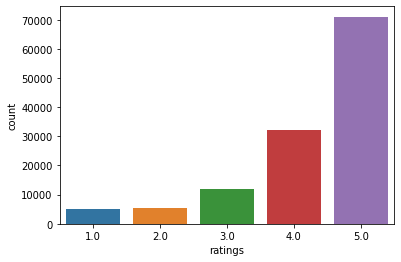

In [15]:
p=sns.countplot(elec_df['ratings'])

In [16]:
print('Number of users who have rated 50 or more items =', len(elec_df))

Number of users who have rated 50 or more items = 125871


In [17]:
# Number of unique user id who rated 50 or more times and unique products id 

print('Number of unique users = ', elec_df['userID'].nunique())
# Number of unique product id  in the data
print('Number of unique products = ', elec_df['productID'].nunique())

Number of unique users =  1540
Number of unique products =  48190


In [18]:
#constructing the pivot table
ratings_matrix = pd.pivot_table(elec_df, index = 'userID', columns ='productID', values = 'ratings',fill_value=0)
ratings_matrix.shape

(1540, 48190)

In [19]:
ratings_matrix.head()

productID,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100WO06OQR8BQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A105S56ODHGJEK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A105TOJ6LTVMBG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10AFVU66A79Y1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



## 3. Build Popularity Recommender model.

In [20]:
elec_df.groupby('productID')['ratings'].mean().head()  

productID
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [21]:
elec_df.groupby('productID')['ratings'].mean().sort_values(ascending=False).head()  

productID
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [22]:
elec_df.groupby('productID')['ratings'].count().sort_values(ascending=False).head()  

productID
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [23]:
ratings_mean_count = pd.DataFrame(elec_df.groupby('productID')['ratings'].mean()) 

In [24]:
ratings_mean_count['rating_counts'] = pd.DataFrame(elec_df.groupby('productID')['ratings'].count())  

In [25]:
ratings_mean_count.head()  

,ratings,rating_counts
productID,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [26]:
sorted_data = ratings_mean_count.sort_values(['rating_counts'], ascending = False)

In [27]:
#top 5 highly rated products sorted 
sorted_data.head()

,ratings,rating_counts
productID,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


#### Weighted Rating:

$$weightedrating = \frac{Number of Product Rating}{(Number of Product Rating + Minimum Votes)}*Mean product rating + \\\frac{Minimum Votes}{(Number of Product Rating + Minimum Votes)}*Mean rating Dataset$$


In [28]:
#Threshold
min_votes = 5

In [29]:
mean_rating_dataset = np.mean(sorted_data.ratings.values)

In [30]:
def weighted_rating(sorted_data, min_votes, mean_rating_dataset):
    weighted_rating = list()
    V = sorted_data.rating_counts.values
    R = sorted_data.ratings.values
    for v, r in zip(V, R):
        if v < 5:
            weighted_rating.append(0)
        else:
            weighted_rating.append((v/(v+min_votes))*r + (min_votes/(v+min_votes))*mean_rating_dataset)
    return(weighted_rating)

In [31]:
sorted_data['weighted_rating'] = weighted_rating(sorted_data , min_votes, mean_rating_dataset)

In [32]:
sorted_data.head()

,ratings,rating_counts,weighted_rating
productID,,,
B0088CJT4U,4.218447,206,4.218363
B003ES5ZUU,4.864130,184,4.846955
B000N99BBC,4.772455,167,4.756247
B007WTAJTO,4.701220,164,4.686831
B00829TIEK,4.436242,149,4.429055


In [33]:
#top 5 highly rated products sorted based on weights
sorted_data.weighted_rating.sort_values(ascending = False).head()

productID
B0052SCU8U    4.908787
B003ES5ZUU    4.846955
B001TH7T2U    4.846100
B00BQ4F9ZA    4.841490
B000FQ2JLW    4.836437
Name: weighted_rating, dtype: float64


## 4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [34]:
from surprise import KNNWithMeans
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict

In [35]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1,5))

In [36]:
data = Dataset.load_from_df(elec_df, reader)

In [37]:
trainset, testset = train_test_split(data, test_size=0.3)

In [38]:
print('Shape of training data: \n')
trainset.ur

Shape of training data: 



defaultdict(list,
            {0: [(0, 5.0),
              (40, 5.0),
              (837, 4.0),
              (270, 5.0),
              (3156, 4.0),
              (3199, 4.0),
              (4244, 5.0),
              (4539, 3.0),
              (5376, 5.0),
              (5401, 2.0),
              (5447, 4.0),
              (5596, 4.0),
              (4755, 5.0),
              (5761, 4.0),
              (5373, 4.0),
              (4778, 5.0),
              (7688, 5.0),
              (9234, 4.0),
              (6494, 5.0),
              (4584, 4.0),
              (10314, 5.0),
              (6303, 3.0),
              (3413, 5.0),
              (11312, 5.0),
              (4851, 5.0),
              (11704, 3.0),
              (12125, 5.0),
              (4082, 5.0),
              (12825, 5.0),
              (13276, 5.0),
              (13291, 5.0),
              (13864, 5.0),
              (8211, 4.0),
              (2957, 5.0),
              (44, 5.0),
              (3957, 4.0),
        

## 5. Build Collaborative Filtering model.

In [39]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [40]:
# run the trained model against the testset
predictions = algo.test(testset)

In [41]:
predictions

[Prediction(uid='A2WLNSZ9U0T1S3', iid='B000FJP0QU', r_ui=5.0, est=4.343065693430657, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3CFU12GS5CZCN', iid='B009IKC60K', r_ui=5.0, est=4.262311455129442, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A21NS06GDEA3V0', iid='B008SJ7CNS', r_ui=4.0, est=4.262311455129442, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A26SO3TOT2TLJE', iid='B004SD2562', r_ui=4.0, est=2.896233569261881, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3HQAPXAJV7PRX', iid='B0041OMWNY', r_ui=5.0, est=4.120144534778682, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2BYV7S1QP2YIG', iid='B00DR0J7OU', r_ui=5.0, est=4.262311455129442, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2MCRCK1V61FWQ', iid='B00DP1WYD2', r_ui=5.0, est=4.7894736842105265, details={'actual_k': 0,

## 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [42]:
#Compute FCP (Fraction of Concordant Pairs).
accuracy.fcp(predictions, verbose=True)

FCP:  0.4452


0.44516889733789117

In [43]:
#Compute MAE (Mean Absolute Error)
accuracy.mae(predictions, verbose=True)

MAE:  0.7795


0.779491364936646

In [44]:
#Compute MSE (Mean Squared Error).
accuracy.mse(predictions, verbose=True)

MSE: 1.1264


1.1264137052821528

In [45]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(predictions, verbose=True)

User-based Model : Test Set
RMSE: 1.0613


1.0613263896097904

## 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [46]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [47]:
top_n = get_top_n(predictions, n=5)

In [48]:
top_n

defaultdict(list,
            {'A2WLNSZ9U0T1S3': [('B001OI2YNS', 5),
              ('B001UI2FPE', 5),
              ('B000U6AHZW', 5),
              ('B000GA7048', 5),
              ('B001HSOFI2', 5)],
             'A3CFU12GS5CZCN': [('B004NDEWWW', 4.653026427962489),
              ('B002V88HFE', 4.6262197520880095),
              ('B007ZWLRSU', 4.578823529411764),
              ('B009IKC60K', 4.262311455129442),
              ('B0078T8346', 4.262311455129442)],
             'A21NS06GDEA3V0': [('B008SJ7CNS', 4.262311455129442),
              ('B0017VLY56', 4.262311455129442),
              ('B001GV002A', 4.262311455129442),
              ('B000UI6MHW', 4.262311455129442),
              ('B00093DM62', 4.262311455129442)],
             'A26SO3TOT2TLJE': [('B003ZYF3LO', 5),
              ('B00BOHNYU6', 5),
              ('B005EOWBKE', 4.935780795820083),
              ('B008O2HW8O', 4.6368779474627075),
              ('B0093HAWZY', 4.603258009506486)],
             'A3HQAPXAJV7PRX': [('B0

In [49]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A2WLNSZ9U0T1S3 ['B001OI2YNS', 'B001UI2FPE', 'B000U6AHZW', 'B000GA7048', 'B001HSOFI2']
A3CFU12GS5CZCN ['B004NDEWWW', 'B002V88HFE', 'B007ZWLRSU', 'B009IKC60K', 'B0078T8346']
A21NS06GDEA3V0 ['B008SJ7CNS', 'B0017VLY56', 'B001GV002A', 'B000UI6MHW', 'B00093DM62']
A26SO3TOT2TLJE ['B003ZYF3LO', 'B00BOHNYU6', 'B005EOWBKE', 'B008O2HW8O', 'B0093HAWZY']
A3HQAPXAJV7PRX ['B007X3VC7W', 'B00CD8ADKO', 'B008DWCRQW', 'B0032ANCIW', 'B00825BZUY']
A2BYV7S1QP2YIG ['B000F9YN22', 'B00C20KWP4', 'B00KWMNDDM', 'B00J2KEVZY', 'B005LJQNQU']
A2MCRCK1V61FWQ ['B00DP1WYD2', 'B0026ZPFCK', 'B00094OX2S', 'B001NITMT8', 'B0014TXMOC']
A1AH8033GWKBY7 ['B007B6YPAW', 'B000BTL0OA', 'B0009WG6KM', 'B003LNZ1L6', 'B00192VWVY']
AG7EF0SVBQOUX ['B004QZFOF6', 'B00EHDZMFO', 'B000067RVL', 'B00AYB9PUQ', 'B000WOIFO2']
A2NX6PABLIJLP1 ['B009OZUPUC', 'B000M2GYF6', 'B002JCSCYS', 'B004GUS4WG', 'B006QB1RPY']
A2S26YGSVXBCFL ['B00JEVHZHC', 'B002XOLT7Y', 'B000WOIFO2', 'B00ISIFWKY', 'B0038KLD50']
A5MCDQ60DWUEV ['B001M4XCHQ', 'B0056TYRMW', 'B002NEGTT2'

A3FEGTOLCWXSV4 ['B00IKF2H12', 'B004H8FNJ4', 'B008EQZ25K', 'B001ENW61I', 'B000UHE8Y2']
A20WUUD9EDWY4N ['B00BI9X7UC', 'B002LTWDSK', 'B00004ZCJE', 'B0098TG67U', 'B006NYJNTG']
A3PDWA32BAMB2Y ['B004W2JKWG', 'B008DW95NA', 'B009IV32AM', 'B005OMOULE', 'B00GFHBP1K']
A2IXK5LB4Y0NYV ['B002JR13BM', 'B004I0J7MA', 'B002C41KJ2', 'B000WGN2IO', 'B004OGXY72']
A2YRX8J4WM5BRX ['B000U5TUWE', 'B0000300QN', 'B009B0MZ1M', 'B001D06BWC', 'B002VPDOH8']
ASCBJEPXTOU0V ['B000QUUFRW', 'B004275EO4', 'B004SBBD8U', 'B009KUT30E', 'B0030DL37I']
AUCISQA1YXX86 ['B0001B1QMY', 'B000051ZOA', 'B002B6IIBE', 'B001RIYOBK', 'B000E5RJJQ']
A30XZK10EZN9V4 ['B004LEAYXY', 'B005DP8YJG', 'B004GZRE1S', 'B002V88HFE', 'B0015EA3NO']
A3F8T3BRXRX5P3 ['B001UI2FPE', 'B00212NO6W', 'B00F0DD0I6', 'B003ES5ZUU', 'B002V88HFE']
A6KL17KKN0A5L ['B00009R6WT', 'B0011NVMO8', 'B002NEGTTW', 'B0047ZH0B6', 'B004CJ8ZIO']
AI8EMB0HUC6Z5 ['B00871SR68', 'B005B5G4S6', 'B008HO9DIG', 'B000CSWCQA', 'B000652M6Y']
A3OYO7B6SS7QLH ['B0000BZL1P', 'B0015DYMVO', 'B000QUUFRW', 

## 8. Summarise your insights.

**Popularity-based recommender system** would recommended products based on frequecy counts and high ratings, which may be not suitable to the user. We see that the same set of 5 products given below would be recomended to user:

**productID**
<br>
B0052SCU8U  $\;\;\;\;\;\;$     4.908787
<br>
B003ES5ZUU  $\;\;\;\;\;\;$     4.846955
<br>
B001TH7T2U  $\;\;\;\;\;\;$     4.846100
<br>
B00BQ4F9ZA  $\;\;\;\;\;\;$     4.841490
<br>
B000FQ2JLW  $\;\;\;\;\;\;$     4.836437
<br>

**Demerit :** non-personalised recommender system.

**Collaborative Filtering** based model predicts based on users’ historical preference on a set of products. Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future.


Collaborative Filtering is a personalised recommender system. The recommendations are based on the past behavior of the user (nearest neighbour) as shown below: 
<br>

**UserID** $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$  **5 recommended products**
<br>
A35Q0RBM3YNQNF $\;\;\;\;\;\;$ ['B002IRPA2G', 'B00310PJM0', 'B00ISKS402', 'B00G4UQ6U8', 'B0035FZ14M']
<br>
A3LDLV1GWQJLEQ $\;\;\;\;\;\;$ ['B0018DQYQ2', 'B0081FLFQE', 'B00BOHNYTW', 'B00F3F0EIU', 'B002TLTGM6']
<br>
AS7J4952JB5XR $\;\;\;\;\;\;\;\;\;\;$ ['B0024FB45Y', 'B008UOQVYC', 'B004MME69S', 'B0013HAC0C', 'B007O2VQNC']
<br>
AYNAH993VDECT $\;\;\;\;\;\;\;\;$ ['B005EOWBKE', 'B001LXMF80', 'B0092MD8OW', 'B0099SMFVQ', 'B000VIHFZ4']
<br>
A3GX0FAMEXV6FB $\;\;\;\;\;\;$ ['B0034CL2ZI', 'B0064FS7HI', 'B0044TNPJQ', 'B005DJEICE', 'B003VQM7Q0']
<br>


**Demerit :** Collaborative Filtering is faced with **cold start** and **grey sheep** (No neighbours). When a new item coming in, until it has to be rated by substantial number of users, the model is not able to make any personalized recommendations . Similarly, for items from the tail that didn’t get too much data, the model tends to give less weight on them and have popularity bias by recommending more popular items.

